In [1]:
# Selenium 설치.
# !pip install selenium

In [2]:
import numpy as np
import re
import time
import matplotlib.pyplot as plt

import urllib.request
import requests as rq
import bs4

import konlpy
from ckonlpy.tag import Twitter        # Okt는 작동하지 않음!
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [3]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

def cleaning(argStr):
    argStr = argStr.lower()
    argStr = re.sub(r'[^가-힣0-9.?!]',  ' ',argStr)
    argStr = re.sub("^.*back", "", argStr)
    argStr = re.sub(r'\s+', ' ',argStr)
    argStr = re.sub(r'\s$', '' ,argStr)
    return(argStr)

def getLstUrlNews(argLstHl):
    lstHyperLinkNews = []
    for hl in argLstHl:
        hlSubj = hl.find('strong')
        if hlSubj:
            strSubj = hlSubj.text
            if (len(strSubj) > 10):
                lstHyperLinkNews.append(hl)
                
    lstLinkNews = [x.get("href") for x in lstHyperLinkNews]
    return(lstLinkNews)

def modiUrl(argUrl):    
    if "https://news.naver.com" not in argUrl:
        argUrl = "https://news.naver.com" + argUrl
        
    return(argUrl)

#문장 하나를 불러옴
def getOneTextNews(argUrl):
    url = modiUrl(argUrl)
    res = rq.get(url, headers=headers)
    time.sleep(0.1)
    
    soup = bs4.BeautifulSoup(res.text, 'html.parser')
    tagCont = soup.find("div", id="articleBodyContents")
    return(cleaning(tagCont.text))

In [4]:
naverNewsUrl = "https://news.naver.com"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}

def getLstTextNews(argUrl, argNum=1):
    lstNewsText =[]
    
    res = rq.get(argUrl, headers=headers)
    time.sleep(0.1)
    
    soup01 = bs4.BeautifulSoup(res.text, 'html.parser')
    lstHyperLinkElm = soup01.find_all('a', class_=re.compile('clicks'))    
    lstUrl = getLstUrlNews(lstHyperLinkElm)
    
    if  argNum==1:
        urlTarget = lstUrl[np.random.randint(0, len(lstUrl))]
        lstNewsText.append(getOneTextNews(urlTarget))
    else:
        for ith in range(argNum):
            lstNewsText.append(getOneTextNews(lstUrl[ith]))
        
    return lstNewsText
    
lstTextNews= getLstTextNews(naverNewsUrl, 1)
print(f"{len(lstTextNews)}\n{lstTextNews}")

1
[' 오류를 우회하기 위한 함수 추가 서울 175명 경기 148명 인천 13명 등 수도권 336명 비수도권 216명 일상 속 소규모 감염 지속 일평균 지역발생 여전히 2.5단계 수준신규확진 666명 하루만에 다시 600명대 서울 연합뉴스 이정훈 기자 22일 오전 서울 성동구 임시선별진료소에서 시민들이 코로나19 검사를 받기위해 줄을 서고 있다. 중앙방역대책본부는 이날 0시 기준으로 코로나19 신규 확진자가 666명 늘어 누적 13만5천344명이라고 밝혔다. 2021.5.22 806 . . 전국종합 연합뉴스 임화섭 권준우 김예나 기자 국내 신종 코로나바이러스 감염증 코로나19 확산세가 곳곳에서 이어지면서 22일에도 전국에서 확진자가 잇따랐다. 방역당국과 서울시 등 각 지방자치단체에 따르면 이날 0시부터 오후 9시까지 전국에서 코로나19 양성 판정을 받은 신규 확진자는 총 552명으로 집계됐다. 전날 같은 시간에 집계된 619명보다 67명 적다. 확진자가 나온 지역을 보면 수도권이 336명 60.9 비수도권이 216명 39.1 이다. 시도별로는 서울 175명 경기 148명 대구 57명 울산 22명 강원 충남 각 19명 경남 16명 부산 인천 전북 각 13명 대전 경북 각 12명 광주 충북 각 9명 제주 8명 전남 7명이다. 전국 17개 시도 가운데 세종에서는 아직 확진자가 나오지 않았다. 집계를 마감하는 자정까지 아직 시간이 남은 만큼 23일 0시 기준으로 발표될 신규 확진자 수는 이보다 더 늘어 600명 안팎 많게는 600명대 초중반에 달할 것으로 보인다. 전날에는 오후 9시 이후 47명 늘어 최종 666명으로 마감됐다. 다만 주말 영향으로 검사 건수가 줄면서 확진자 발생도 다소 주춤할 수 있다. 보통 휴일부터 주 초반까지는 확진자 수가 감소했다가 중반 이후 다시 증가하는 흐름을 나타낸다. 최근 코로나19 발생 양상을 보면 일상 공간에서 크고 작은 집단감염이 잇따르면서 확산세가 이어지고 있다. 지난 16일부터 이날까지 최근 1주일간 발생한 신규 확진자는 일별

In [5]:
kkma = konlpy.tag.Kkma()
lstSent = kkma.sentences(lstTextNews[0])
print(f"{len(lstSent)}\n{lstSent}")

19
['오류를 우회하기 위한 함수 추가 서울 175명 경기 148명 인천 13명 등 수도권 336명 비수도권 216명 일상 속 소규모 감염 지속 일 평균 지역발생 여전히 2.5 단계 수준 신규 확 진 666명 하루만에 다시 600명 대 서울 연합 뉴스 이 정훈 기자 22일 오전 서울 성동구 임시 선별 진료소에서 시민들이 코로나 19 검사를 받기 위해 줄을 서고 있다.', '중앙 방역대책본부는 이날 0시 기준으로 코로나 19 신규 확 진자가 666명 늘어 누적 13만 5천 344명이라고 밝혔다.', '2021.5.22 806 . . 전국종합 연합 뉴스 임 화섭 권 준우 김 예나 기자 국내 신종 코로나 바 이러스 감염증 코로나 19 확산 세가 곳곳에서 이어지면서 22일에도 전국에서 확 진자가 잇따랐다.', '방역당국과 서울시 등 각 지방자치단체에 따르면 이날 0시부터 오후 9시까지 전국에서 코로나 19 양 성 판정을 받은 신규 확 진자는 총 552명으로 집계됐다.', '전날 같은 시간에 집계된 619명보다 67명 적다.', '확 진자가 나온 지역을 보면 수도권이 336명 60.9 비수도권이 216명 39.1 이다.', '시도 별로는 서울 175명 경기 148명 대구 57명 울산 22명 강원 충남 각 19명 경남 16명 부산 인천 전 북 각 13명 대전 경북 각 12명 광주 충북 각 9명 제주 8명 전 남 7명이다.', '전국 17개 시도 가운데 세종에서는 아직 확 진자가 나오지 않았다.', '집계를 마감하는 자정까지 아직 시간이 남은 만큼 23일 0시 기준으로 발표될 신규 확 진자 수는 이보다 더 늘어 600명 안팎 많게는 600명 대 초 중반에 달할 것으로 보인다.', '전날에는 오후 9시 이후 47명 늘어 최종 666명으로 마감됐다.', '다만 주말 영향으로 검사 건수가 줄면서 확 진자 발생도 다소 주춤 할 수 있다.', '보통 휴일부터 주 초반 까지는 확 진자 수가 감소했다가 중반 이후 다시 증가하는 흐름을 나타낸다.', '최근 코로나 19 발생 양상을 보

In [6]:
lstPosSent = []
for x in lstSent:
    lstPosSent.append(kkma.pos(x))

print(f"{len(lstPosSent)}\n{lstPosSent}")

19
[[('오류', 'NNG'), ('를', 'JKO'), ('우회', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('위하', 'VV'), ('ㄴ', 'ETD'), ('함수', 'NNG'), ('추가', 'NNG'), ('서울', 'NNG'), ('175', 'NR'), ('명', 'NNM'), ('경기', 'NNG'), ('148', 'NR'), ('명', 'NNM'), ('인천', 'NNG'), ('13', 'NR'), ('명', 'NNM'), ('등', 'NNB'), ('수도권', 'NNG'), ('336', 'NR'), ('명', 'NNM'), ('비', 'XPN'), ('수도권', 'NNG'), ('216', 'NR'), ('명', 'NNM'), ('일상', 'NNG'), ('속', 'NNG'), ('소규모', 'NNG'), ('감염', 'NNG'), ('지속', 'NNG'), ('일', 'NNG'), ('평균', 'NNG'), ('지역', 'NNG'), ('발생', 'NNG'), ('여전히', 'MAG'), ('2.5', 'NR'), ('단계', 'NNG'), ('수준', 'NNG'), ('신규', 'NNG'), ('확', 'MAG'), ('진', 'NNG'), ('666', 'NR'), ('명', 'NNM'), ('하루', 'NNG'), ('만', 'JX'), ('에', 'JC'), ('다시', 'MAG'), ('600', 'NR'), ('명', 'NNM'), ('대', 'NNB'), ('서울', 'NNG'), ('연합', 'NNG'), ('뉴스', 'NNG'), ('이', 'NNG'), ('정훈', 'NNG'), ('기자', 'NNG'), ('22', 'NR'), ('일', 'NNM'), ('오전', 'NNG'), ('서울', 'NNG'), ('성동구', 'NNP'), ('임시', 'NNG'), ('선별', 'NNG'), ('진료소', 'NNG'), ('에서', 'JKM'), ('시민', 'NNG'), ('들', 'XSN'

In [7]:
from ckonlpy.tag import Twitter        # Okt는 작동하지 않음!
my_twitter=Twitter()   

twitPosSent = []
for x in lstSent:
    twitPosSent.append(my_twitter.pos(x))
print(f"{len(twitPosSent)}\n{twitPosSent}")

C:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


19
[[('오류', 'Noun'), ('를', 'Josa'), ('우회', 'Noun'), ('하기', 'Verb'), ('위', 'Noun'), ('한', 'Josa'), ('함수', 'Noun'), ('추가', 'Noun'), ('서울', 'Noun'), ('175', 'Number'), ('명', 'Noun'), ('경기', 'Noun'), ('148', 'Number'), ('명', 'Noun'), ('인천', 'Noun'), ('13', 'Number'), ('명', 'Noun'), ('등', 'Noun'), ('수도권', 'Noun'), ('336', 'Number'), ('명', 'Noun'), ('비', 'Noun'), ('수도권', 'Noun'), ('216', 'Number'), ('명', 'Noun'), ('일상', 'Noun'), ('속', 'Noun'), ('소규모', 'Noun'), ('감염', 'Noun'), ('지속', 'Noun'), ('일', 'Noun'), ('평균', 'Noun'), ('지역', 'Noun'), ('발생', 'Noun'), ('여전', 'Noun'), ('히', 'Adverb'), ('2.5', 'Number'), ('단계', 'Noun'), ('수준', 'Noun'), ('신규', 'Noun'), ('확', 'Noun'), ('진', 'Noun'), ('666', 'Number'), ('명', 'Noun'), ('하루', 'Noun'), ('만에', 'Josa'), ('다시', 'Noun'), ('600', 'Number'), ('명', 'Noun'), ('대', 'Verb'), ('서울', 'Noun'), ('연합', 'Noun'), ('뉴스', 'Noun'), ('이', 'Noun'), ('정훈', 'Noun'), ('기자', 'Noun'), ('22일', 'Number'), ('오전', 'Noun'), ('서울', 'Noun'), ('성동구', 'Noun'), ('임시', 'Noun'), ('선별',

In [8]:
lstPosStop = []
def makeLstNormSent(argLstPosSent,argLstPosStop, argPos=False, argMinLen=0, argOne=True):
    
    lstStrSent = []
    
    for oneSent in argLstPosSent:
        strOneSent = ""
        for word, pos in oneSent:
            lstIsStop = [x in pos for x in argLstPosStop]
            if not any(lstIsStop) and len(word) >= argMinLen:
                if argPos==True:
                    strOneSent += (" "+ word +"-"+pos)
                else:
                    strOneSent += (" "+ word)
        lstStrSent.append(strOneSent)
        
    if argOne==True:
        lstStrSent = [" ".join(lstStrSent)]
    return(lstStrSent)

lstNormSent = makeLstNormSent(twitPosSent, lstPosStop, argPos=False, argMinLen=0, argOne=False)

print(f"{len(lstNormSent)}\n{lstNormSent}")

19
[' 오류 를 우회 하기 위 한 함수 추가 서울 175 명 경기 148 명 인천 13 명 등 수도권 336 명 비 수도권 216 명 일상 속 소규모 감염 지속 일 평균 지역 발생 여전 히 2.5 단계 수준 신규 확 진 666 명 하루 만에 다시 600 명 대 서울 연합 뉴스 이 정훈 기자 22일 오전 서울 성동구 임시 선별 진료 소 에서 시민 들이 코로나 19 검사 를 받기 위해 줄 을 서고 있다 .', ' 중앙 방역 대책 본부 는 이 날 0시 기준 으로 코로나 19 신규 확 진자 가 666 명 늘어 누적 13만 5천 344 명 이라고 밝혔다 .', ' 2021.5 . 22 806 . . 전국 종합 연합 뉴스 임 화섭 권 준우 김 예나 기자 국내 신종 코로나 바 이러스 감염증 코로나 19 확산 세 가 곳곳 에서 이어 지면 서 22일 에도 전국 에서 확 진자 가 잇따랐다 .', ' 방역 당국 과 서울시 등 각 지방자치단체 에 따르면 이 날 0 시부 터 오후 9시 까지 전국 에서 코로나 19 양 성 판정 을 받은 신규 확 진자 는 총 552 명 으로 집계 됐다 .', ' 전날 같은 시간 에 집계 된 619 명보 다 67 명 적다 .', ' 확 진자 가 나온 지역 을 보면 수도권 이 336 명 60.9 비 수도권 이 216 명 39.1 이다 .', ' 시도 별로 는 서울 175 명 경기 148 명 대구 57 명 울산 22 명 강원 충남 각 19 명 경남 16 명 부산 인천 전 북 각 13 명 대전 경북 각 12 명 광주 충북 각 9 명 제주 8 명 전 남 7 명 이다 .', ' 전국 17 개 시도 가운데 세종 에서는 아직 확 진자 가 나 오지 않았다 .', ' 집계 를 마감 하는 자정 까지 아직 시간 이 남은 만큼 23일 0시 기준 으로 발표 될 신규 확 진자 수 는 이보 다 더 늘어 600 명 안팎 많게는 600 명 대 초 중반 에 달 할 것 으로 보인다 .', ' 전날 에는 오후 9시 이후 47 명 늘어 최종 666 명 으로 마감 됐다 .', ' 다만 주말

In [9]:
lstPosStop = []
def makeLstNormSent(argLstPosSent,argLstPosStop, argPos=False, argMinLen=0, argOne=True):
    
    lstStrSent = []
    
    for oneSent in argLstPosSent:
        strOneSent = ""
        for word, pos in oneSent:
            lstIsStop = [x in pos for x in argLstPosStop]
            if not any(lstIsStop) and len(word) >= argMinLen:
                if argPos==True:
                    strOneSent += (" "+ word +"-"+pos)
                else:
                    strOneSent += (" "+ word)
        lstStrSent.append(strOneSent)
        
    if argOne==True:
        lstStrSent = [" ".join(lstStrSent)]
    return(lstStrSent)

twitNormSent = makeLstNormSent(twitPosSent, lstPosStop, argPos=False, argMinLen=0, argOne=False)

print(f"{len(twitNormSent)}\n{twitNormSent}")

19
[' 오류 를 우회 하기 위 한 함수 추가 서울 175 명 경기 148 명 인천 13 명 등 수도권 336 명 비 수도권 216 명 일상 속 소규모 감염 지속 일 평균 지역 발생 여전 히 2.5 단계 수준 신규 확 진 666 명 하루 만에 다시 600 명 대 서울 연합 뉴스 이 정훈 기자 22일 오전 서울 성동구 임시 선별 진료 소 에서 시민 들이 코로나 19 검사 를 받기 위해 줄 을 서고 있다 .', ' 중앙 방역 대책 본부 는 이 날 0시 기준 으로 코로나 19 신규 확 진자 가 666 명 늘어 누적 13만 5천 344 명 이라고 밝혔다 .', ' 2021.5 . 22 806 . . 전국 종합 연합 뉴스 임 화섭 권 준우 김 예나 기자 국내 신종 코로나 바 이러스 감염증 코로나 19 확산 세 가 곳곳 에서 이어 지면 서 22일 에도 전국 에서 확 진자 가 잇따랐다 .', ' 방역 당국 과 서울시 등 각 지방자치단체 에 따르면 이 날 0 시부 터 오후 9시 까지 전국 에서 코로나 19 양 성 판정 을 받은 신규 확 진자 는 총 552 명 으로 집계 됐다 .', ' 전날 같은 시간 에 집계 된 619 명보 다 67 명 적다 .', ' 확 진자 가 나온 지역 을 보면 수도권 이 336 명 60.9 비 수도권 이 216 명 39.1 이다 .', ' 시도 별로 는 서울 175 명 경기 148 명 대구 57 명 울산 22 명 강원 충남 각 19 명 경남 16 명 부산 인천 전 북 각 13 명 대전 경북 각 12 명 광주 충북 각 9 명 제주 8 명 전 남 7 명 이다 .', ' 전국 17 개 시도 가운데 세종 에서는 아직 확 진자 가 나 오지 않았다 .', ' 집계 를 마감 하는 자정 까지 아직 시간 이 남은 만큼 23일 0시 기준 으로 발표 될 신규 확 진자 수 는 이보 다 더 늘어 600 명 안팎 많게는 600 명 대 초 중반 에 달 할 것 으로 보인다 .', ' 전날 에는 오후 9시 이후 47 명 늘어 최종 666 명 으로 마감 됐다 .', ' 다만 주말

In [10]:
def makeNGram(argLstSent, argNum=3):
    vectMy = CountVectorizer(ngram_range=(argNum, argNum), analyzer="word")
    lstNGram = vectMy.fit(argLstSent).get_feature_names()
    # ar2NGramCnt = vectMy.transform(argLstSent).toarray()        # 결과는 array of array.
    # lstNGramCnt = list(ar2NGramCnt[0])                          # 단순한 리스트로 변환.
    return(lstNGram)

lstNGram = makeNGram(twitNormSent)
print(f"{len(lstNGram)}\n{lstNGram}")

328
['0시 기준 으로', '12 광주 충북', '13 대전 경북', '13 수도권 336', '13만 5천 344', '148 대구 57', '148 인천 13', '16 부산 인천', '16 일부 까지', '17 시도 가운데', '175 경기 148', '19 검사 받기', '19 경남 16', '19 발생 양상', '19 신규 진자', '19 판정 받은', '19 확산 곳곳', '2021 22 806', '216 39 이다', '216 일상 소규모', '22 806 전국', '22 강원 충남', '22일 에도 전국', '22일 오전 서울', '23일 0시 기준', '336 60 수도권', '336 수도권 216', '344 이라고 밝혔다', '400 500 이상', '47 늘어 최종', '500 이상 범위', '528 654 646', '552 으로 집계', '561 666 으로', '57 울산 22', '58 명의 감염', '587 으로 여전', '5천 344 이라고', '60 까지 불어', '60 수도권 216', '600 서울 연합', '600 안팎 많게는', '600 중반 으로', '610 619 528', '619 528 654', '619 명보 67', '646 561 666', '654 646 561', '666 늘어 누적', '666 으로 마감', '666 으로 하루', '666 하루 만에', '806 전국 종합', '9시 까지 전국', '9시 이후 47', '가늠 있는 평균', '가운데 사회 거리', '가운데 세종 에서는', '감소 다가 중반', '감염 사례 보면', '감염 상황 가늠', '감염 잇따르 면서', '감염 자가 발생', '감염 지속 평균', '감염증 코로나 19', '강원 충남 19', '같은 시간 집계', '거리 단계 조정', '검사 받기 위해', '검사 수가 면서', '경기 148 대구', '경기 148 인천', '경남 16 부산', '경남 에서는 기존', '경북 12 광주', '곳곳 에서 이어', '공간 에서 크고',

In [11]:
def makeBaseDic(argLstNGram, argNum=3):
    dicBase = {}
    
    for x in argLstNGram:
        lstWord = nltk.word_tokenize(x)
        preGram = ' '.join(lstWord[0:argNum-1])
        postGram = lstWord[-1]
        
        if preGram not in dicBase.keys():
            dicBase[preGram] = [postGram]
        else:
            dicBase[preGram] += [postGram]
    return(dicBase)

dicBase = makeBaseDic(lstNGram)
print(f"{len(dicBase)}\n{dicBase}")

307
{'0시 기준': ['으로'], '12 광주': ['충북'], '13 대전': ['경북'], '13 수도권': ['336'], '13만 5천': ['344'], '148 대구': ['57'], '148 인천': ['13'], '16 부산': ['인천'], '16 일부': ['까지'], '17 시도': ['가운데'], '175 경기': ['148'], '19 검사': ['받기'], '19 경남': ['16'], '19 발생': ['양상'], '19 신규': ['진자'], '19 판정': ['받은'], '19 확산': ['곳곳'], '2021 22': ['806'], '216 39': ['이다'], '216 일상': ['소규모'], '22 806': ['전국'], '22 강원': ['충남'], '22일 에도': ['전국'], '22일 오전': ['서울'], '23일 0시': ['기준'], '336 60': ['수도권'], '336 수도권': ['216'], '344 이라고': ['밝혔다'], '400 500': ['이상'], '47 늘어': ['최종'], '500 이상': ['범위'], '528 654': ['646'], '552 으로': ['집계'], '561 666': ['으로'], '57 울산': ['22'], '58 명의': ['감염'], '587 으로': ['여전'], '5천 344': ['이라고'], '60 까지': ['불어'], '60 수도권': ['216'], '600 서울': ['연합'], '600 안팎': ['많게는'], '600 중반': ['으로'], '610 619': ['528'], '619 528': ['654'], '619 명보': ['67'], '646 561': ['666'], '654 646': ['561'], '666 늘어': ['누적'], '666 으로': ['마감', '하루'], '666 하루': ['만에'], '806 전국': ['종합'], '9시 까지': ['전국'], '9시 이후': ['47'], '가늠 있는': 

In [12]:
def makeLstSeed(argDic):
    return sorted(argDic.items(), key=lambda x : len(x[1]), reverse=True)

lstSeed =makeLstSeed(dicBase)
print(f"{len(lstSeed)}\n{lstSeed}")

307
[('코로나 19', ['검사', '발생', '신규', '판정', '확산']), ('신규 진자', ['552', '666', '이보', '일별']), ('연합 뉴스', ['구독', '무단', '정훈', '화섭']), ('666 으로', ['마감', '하루']), ('경기 148', ['대구', '인천']), ('기준 으로', ['발표', '코로나']), ('수도권 216', ['39', '일상']), ('수도권 336', ['60', '수도권']), ('여전 단계', ['수준', '전국']), ('오후 9시', ['까지', '이후']), ('인천 13', ['대전', '수도권']), ('전국 에서', ['진자', '코로나']), ('중심 으로', ['58', '진자']), ('지역 발생', ['여전', '진자']), ('0시 기준', ['으로']), ('12 광주', ['충북']), ('13 대전', ['경북']), ('13 수도권', ['336']), ('13만 5천', ['344']), ('148 대구', ['57']), ('148 인천', ['13']), ('16 부산', ['인천']), ('16 일부', ['까지']), ('17 시도', ['가운데']), ('175 경기', ['148']), ('19 검사', ['받기']), ('19 경남', ['16']), ('19 발생', ['양상']), ('19 신규', ['진자']), ('19 판정', ['받은']), ('19 확산', ['곳곳']), ('2021 22', ['806']), ('216 39', ['이다']), ('216 일상', ['소규모']), ('22 806', ['전국']), ('22 강원', ['충남']), ('22일 에도', ['전국']), ('22일 오전', ['서울']), ('23일 0시', ['기준']), ('336 60', ['수도권']), ('336 수도권', ['216']), ('344 이라고', ['밝혔다']), ('400 500', ['이상']), ('47 늘어', 

In [13]:
def predByNGram(argPreGram, argDicBase):
    rangeIdx = len(argDicBase[argPreGram])
    idxPic = np.random.randint(0, rangeIdx)
    return(argDicBase[argPreGram][idxPic])

predByNGram(lstSeed[0][0], dicBase)

'판정'

In [14]:
def genSentByNGram(argLstSeed, argDicBase, argNum):    
    cnt = 0
    strOut = ""
    while cnt < argNum:
        preGram = argLstSeed.pop(0)[0]
        strOut += " " + preGram
        while preGram in argDicBase:
            strOut += " " + predByNGram(preGram, argDicBase)
            lstWord = nltk.word_tokenize(strOut)
            preGram = ' '.join(lstWord[-3+1:])                   # a_nm1_gram 갱신.
            cnt +=1
            if cnt > argNum:
                break
    return(strOut)
lstSeed1 = lstSeed[:]

genSentByNGram(lstSeed1, dicBase, 50)

' 코로나 19 발생 양상 보면 일상 공간 에서 크고 작은 집단 감염 잇따르 면서 확산 이어 지고 있다 신규 진자 일별 610 619 528 654 646 561 666 으로 하루 평균 612 나왔다 연합 뉴스 무단 재배 금지 666 으로 마감 됐다 경기 148 인천 13 수도권 336 60 수도권 216 39 이다 기준 으로 발표 신규 진자 일별 610 619 528 654'

### 품사
- 의존명사 NNB
- 대명사 NP
- 감탕사(IC)
- 보조사(JX)
- 접속조사(JC)

- 선어말어미(EP)

- SF

- 동사(VV)  VXV
- 형용사(VA) VXA
- 일반부사(MAG)
- 접속부사(MAC)
- 감탕


## Generate Sentence By Trigram

In [15]:
def genSentByNGram(argStr, argNumWord, argLstPosStop):
    kkma = konlpy.tag.Kkma()
    
    my_twitter=Twitter()   
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
    
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(my_twitter.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,              # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=False,            # 품사정보는 출력하지 않음
                                  argMinLen=0,             # 최소 단어 길이
                                  argOne=False)             # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")
    
    lstNGram = makeNGram(lstNormSent, argNum=3)
#     print(f"{len(lstNGram)}\n{lstNGram}")
    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed}")
    
    cnt = 0
    strOut = ""
    while cnt < argNumWord:
        preGram = lstSeed.pop(0)[0]
        strOut += " " + preGram
        while preGram in dicBase:
            strOut += " " + predByNGram(preGram, dicBase)
            lstWord = nltk.word_tokenize(strOut)
            preGram = ' '.join(lstWord[-3+1:])                   # a_nm1_gram 갱신.
            cnt +=1
            if cnt > argNumWord:
                break
    return(strOut)

# Trigram을 이용하여 50단어로 요약(제거 품사는 없음)
lstPosStop=[]
genSentByNGram(lstTextNews[0], 50, lstPosStop)

' 코로나 19 확산 곳곳 에서 이어 지면 22일 에도 전국 에서 진자 잇따랐다 신규 진자 이보 늘어 600 안팎 많게는 600 중반 으로 보인다 연합 뉴스 구독 클릭 팩트 체크 국립 태극기 반입 한다 666 으로 마감 됐다 경기 148 대구 57 울산 22 강원 충남 19 경남 16 부산 인천 13 대전 경북 12 광주 충북 제주 이다 기준 으로 코로나 19'

## WordCloud

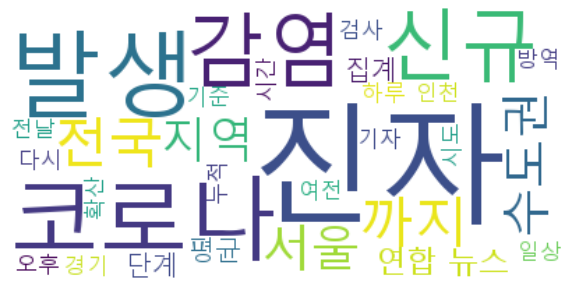

In [16]:
def makeWordCloud(argStr, argNumWord, argLstPosStopWC):
    kkma = konlpy.tag.Kkma()
    my_twitter=Twitter()  
    lstSent = kkma.sentences(argStr)
#     print(f"{len(lstSent)}\n{lstSent}")
    
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(my_twitter.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")
    
    lstNormSent = makeLstNormSent(lstPosSent,              # 입력
                                  argLstPosStopWC,         # 제거 품사 리스트
                                  argPos=False,            # 품사정보는 출력하지 않음
                                  argMinLen=2,             # 최소 단어 길이
                                  argOne=True)             # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                   background_color='white',
                   max_words=argNumWord)
    wc.generate(lstNormSent[0])

    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")                                    
    plt.show()

    #수정
# 형태소 분석하여 불용 품사 및 2음절 이하 단어 제거하고
# 나머지 형태소들로 1개의 문자열을 만듬(단어 수 정의)
lstPosStopWC = ["Josa","Number",'Punctuation','Alpha','Verb','Adjective']
makeWordCloud(lstTextNews[0], 30, lstPosStopWC)

## RNN Generator

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import re

In [18]:
def makeCorpus(argLstSent):
    lstCorpus = []
    for aSent in argLstSent:
        aSent = aSent.split()
        lstCorpus.append(aSent)
    return lstCorpus

corpusRaw = makeCorpus(lstNormSent)
print(f"{len(corpusRaw)}\n{corpusRaw}")

19
[['오류', '를', '우회', '하기', '위', '한', '함수', '추가', '서울', '175', '명', '경기', '148', '명', '인천', '13', '명', '등', '수도권', '336', '명', '비', '수도권', '216', '명', '일상', '속', '소규모', '감염', '지속', '일', '평균', '지역', '발생', '여전', '히', '2.5', '단계', '수준', '신규', '확', '진', '666', '명', '하루', '만에', '다시', '600', '명', '대', '서울', '연합', '뉴스', '이', '정훈', '기자', '22일', '오전', '서울', '성동구', '임시', '선별', '진료', '소', '에서', '시민', '들이', '코로나', '19', '검사', '를', '받기', '위해', '줄', '을', '서고', '있다', '.'], ['중앙', '방역', '대책', '본부', '는', '이', '날', '0시', '기준', '으로', '코로나', '19', '신규', '확', '진자', '가', '666', '명', '늘어', '누적', '13만', '5천', '344', '명', '이라고', '밝혔다', '.'], ['2021.5', '.', '22', '806', '.', '.', '전국', '종합', '연합', '뉴스', '임', '화섭', '권', '준우', '김', '예나', '기자', '국내', '신종', '코로나', '바', '이러스', '감염증', '코로나', '19', '확산', '세', '가', '곳곳', '에서', '이어', '지면', '서', '22일', '에도', '전국', '에서', '확', '진자', '가', '잇따랐다', '.'], ['방역', '당국', '과', '서울시', '등', '각', '지방자치단체', '에', '따르면', '이', '날', '0', '시부', '터', '오후', '9시', '까지', '전국', '에서', '코로나', '1

In [19]:
def getLenMaxSent(argLstStr):
    lenMax = 0
    for aStr in argLstStr:
        lenSent = len(aStr.split())
        if lenMax < lenSent: 
            lenMax = lenSent
    return lenMax

lenMaxSent = getLenMaxSent(lstNormSent)
print(lenMaxSent)

78


In [20]:
# Corpus로 만든 사전 크기 확인.
tokenizerMy = Tokenizer()
tokenizerMy.fit_on_texts(corpusRaw)
sizeVocab = len(tokenizerMy.word_index)
print(f"sizeVocab : {sizeVocab}")

# padding포함한 단어로 tokenize
tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
tokenizerMy.fit_on_texts(corpusRaw)
    
# Encoded corpus 만들기
corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
# print(corpusEncoded)

sizeVocab : 311


In [21]:
def makeTrainData(argCorpusEncoded, argLenMaxSent):
        # 학습용 문장 데이터를 만든다.
    trainDataEncoded = []
    for aSentEncoded in argCorpusEncoded:
        for ith in range(2, len(aSentEncoded)+1):
            aSequence = aSentEncoded[:ith]
            trainDataEncoded.append(aSequence)
            
    trainDataEncodedPad = pad_sequences(trainDataEncoded,
                                        maxlen=argLenMaxSent,
                                        padding='pre')
    # X와 Y로 쪼갠다.
    XTrain    = trainDataEncodedPad[:,:-1]      # 끝에서 두번째 컬럼까지.
    YTrainRaw = trainDataEncodedPad[:, -1]      # 마지막 컬럼.
    
    return XTrain, YTrainRaw

XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
print(XTrain)

# YTrain을 one-hot encoding 해둔다.
YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)
print(YTrain)


[[  0   0   0 ...   0   0 100]
 [  0   0   0 ...   0 100  13]
 [  0   0   0 ... 100  13 101]
 ...
 [  0   0   0 ... 307  37 308]
 [  0   0   0 ...  37 308 309]
 [  0   0   0 ... 308 309 310]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [22]:
def makeRnnModel(argXTrain, argYTrain, argNumWords, argEpochs):
    # Model 생성
    numWords = argNumWords + 1
    numEmb = 10                                  # Embedding 차원수.
    numHidden = 128                              # 메모리셀의 노드수.
    modelRNN = Sequential()
    modelRNN.add(Embedding(numWords, numEmb))
    modelRNN.add(LSTM(units=numHidden, return_sequences=False)) 
    modelRNN.add(Dense(units=numWords, activation='softmax'))

    # Optimizer 객체 생성 후 컴파일한다.
    rateLearn = 0.001   # Hyper Parameter 설정
    optMy = Adam(lr=rateLearn)
    modelRNN.compile(loss='categorical_crossentropy',
                     optimizer=optMy,
                     metrics=['accuracy'])
    
    # 학습.
    eStopMy = EarlyStopping(monitor='loss',
                            mode='min',
                            patience=5,
                            verbose=1)          # 조기 종료 허락!
    
    smryMy = modelRNN.fit(argXTrain,
                          argYTrain,
                          epochs=argEpochs,
                          verbose=0,
                          callbacks=[eStopMy])
        
    return modelRNN

modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=30)    

In [23]:
# 확률적으로 다음 단어를 예측해 주는 헬퍼 함수.
def stochasticPrediction(argPreds, argTemperature=1.0):
    predsMy = np.array(argPreds).astype('float64')
    # "온도"가 낮을수록 확정적, 높을수록 확률적이 된다.
    predsMy = np.log(predsMy)/ argTemperature
    predsExp = np.exp(predsMy)
    predsMy = predsExp/np.sum(predsExp)
    # 1회 1개의 랜덤 표본만 추출한다.
    probabilities = np.random.multinomial(n=1, pvals=predsMy, size=1)
    return np.argmax(probabilities)

# 예측을 위한 헬퍼 함수 버전
def makeSentRnn(argModel, argToken, argLstSeed, argLenMaxSent, argNumWord, argReset=True, temperature=1.0): 
#    print(argToken.word_index)
    cnt=0
    strIn = argLstSeed.pop(0)[0]
    strOut = strIn
    
    while cnt < argNumWord:        
        # 완성되가는 문장의 인터저 인코딩.
#         print(strIn)
#         encoded = argToken.texts_to_sequences([strIn])[0]
        encoded = []
        for x in strIn.split():
            encoded.append(argToken.word_index[x])
#        print(encoded)
        
        # Padding을 적용해서 X_test를 만든다.
        XTest = pad_sequences([encoded], maxlen=argLenMaxSent-1, padding='pre')
#         print(XTest)
        
        # softmax를 통해서 출력된 예측은 일종의 "multinomial" 확률이다.
        my_preds = argModel.predict(XTest)
        
        # 다음 단어의 인덱스를 예측한다.
        idx = stochasticPrediction(my_preds[0], temperature)
#         print(f"idx : {idx}")
        
        # 예측된 인덱스를 실제 단어로 변환.
        wordPred = argToken.index_word[idx]
#         print(wordPred)

        strOut += " " + wordPred
        
        
        #수정 필요
        if argReset:
            if wordPred in [".",  "?", "!", ".-sf", "?-sf", "!-sf"]:
                strIn   = argLstSeed.pop(0)[0]
                strOut += " " + strIn
            else:
                strIn += " "  + wordPred
        else:
            strIn += " " + wordPred
            if wordPred in [".",  "?", "!", ".-sf", "?-sf", "!-sf"]:
                strSeed = argLstSeed.pop(0)[0]
                strIn  += " " + strSeed
                strOut += " " + strSeed
            
        cnt += 1
        
    return strOut


lstSeed01 = lstSeed[:]
makeSentRnn(modelRNN,
            tokenizerMy,
            lstSeed01,
            lenMaxSent,
            100,
            argReset=False,
            temperature=0.5)

'코로나 19 기존 확 진자 가 감소 명 으로 수도권 수도권 감염 이 등 단계 명 이 바 비 전국 이어 이어 . 신규 진자 을 있다 . 연합 뉴스 . 666 으로 . 경기 148 . 기준 으로 . 수도권 216 . 수도권 336 . 여전 단계 . 오후 9시 뉴스 . 인천 13 . 전국 에서 . 중심 으로 으로 있다 . 지역 발생 . 0시 기준 . 12 광주 자를 명 대 서울 히 16 단계 단계 선별 중심 주 흐름 적다 중앙 종합 사자 국립 대전 위해 을 줄 있다 . 13 대전 으로 . 13 수도권 . 13만 5천 발생 이용자 . 148 대구 으로 잇따랐다 발생 . 148 인천 히 . 16 부산 2.5 2.5 히 단계 단계 오전 들이 에서 전국 에서 에서 에서 신규 신규 확 진자 가 전국 수 . 16 일부 . 17 시도 . 175 경기 . 19 검사 전날 주요'

#### 1. RNN With Normal/Ending

In [24]:
def addClosingToSent(argLstSent):
    lstSentAddClosing = []
    endingPre = ". "
    for aSent in argLstSent:
        aSent = endingPre + aSent
        lstSentAddClosing.append(aSent)
        
        ending = aSent.split()[-1][-1]
        if ending in [".", "!", "?"]:
            endingPre = ending + " "
    return lstSentAddClosing

lstSentAddClosing = addClosingToSent(lstSent)
print(f"{len(lstSentAddClosing)}\n{lstSentAddClosing}")


19
['. 오류를 우회하기 위한 함수 추가 서울 175명 경기 148명 인천 13명 등 수도권 336명 비수도권 216명 일상 속 소규모 감염 지속 일 평균 지역발생 여전히 2.5 단계 수준 신규 확 진 666명 하루만에 다시 600명 대 서울 연합 뉴스 이 정훈 기자 22일 오전 서울 성동구 임시 선별 진료소에서 시민들이 코로나 19 검사를 받기 위해 줄을 서고 있다.', '. 중앙 방역대책본부는 이날 0시 기준으로 코로나 19 신규 확 진자가 666명 늘어 누적 13만 5천 344명이라고 밝혔다.', '. 2021.5.22 806 . . 전국종합 연합 뉴스 임 화섭 권 준우 김 예나 기자 국내 신종 코로나 바 이러스 감염증 코로나 19 확산 세가 곳곳에서 이어지면서 22일에도 전국에서 확 진자가 잇따랐다.', '. 방역당국과 서울시 등 각 지방자치단체에 따르면 이날 0시부터 오후 9시까지 전국에서 코로나 19 양 성 판정을 받은 신규 확 진자는 총 552명으로 집계됐다.', '. 전날 같은 시간에 집계된 619명보다 67명 적다.', '. 확 진자가 나온 지역을 보면 수도권이 336명 60.9 비수도권이 216명 39.1 이다.', '. 시도 별로는 서울 175명 경기 148명 대구 57명 울산 22명 강원 충남 각 19명 경남 16명 부산 인천 전 북 각 13명 대전 경북 각 12명 광주 충북 각 9명 제주 8명 전 남 7명이다.', '. 전국 17개 시도 가운데 세종에서는 아직 확 진자가 나오지 않았다.', '. 집계를 마감하는 자정까지 아직 시간이 남은 만큼 23일 0시 기준으로 발표될 신규 확 진자 수는 이보다 더 늘어 600명 안팎 많게는 600명 대 초 중반에 달할 것으로 보인다.', '. 전날에는 오후 9시 이후 47명 늘어 최종 666명으로 마감됐다.', '. 다만 주말 영향으로 검사 건수가 줄면서 확 진자 발생도 다소 주춤 할 수 있다.', '. 보통 휴일부터 주 초반 까지는 확 진자 수가 감소했다가 중반 이후 다시 증가하는 흐름을 나타낸

In [25]:
def genSentByRnn(argStr, argLstPosStop, argType="Norm", argReset=True, argNumWord=100, argEpochs=100):

#     print(argStr)
    kkma = konlpy.tag.Kkma()
    my_twitter=Twitter()  
    lstSent = kkma.sentences(argStr)
    
    if argType=="Ending":
        lstSent = addClosingToSent(lstSent)
        
#     print(f"{len(lstSent)}\n{lstSent}")
        
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(my_twitter.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,            # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=False,          # 품사정보는 출력하지 않음
                                  argMinLen=0,           # 최소 단어 길이
                                  argOne=False)           # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    lstNGram = makeNGram(lstNormSent, argNum=3)
#     print(f"{len(lstNGram)}\n{lstNGram}")    
    dicBase = makeBaseDic(lstNGram)
#     print(f"{len(dicBase)}\n{dicBase}")
    lstSeed =makeLstSeed(dicBase)
#     print(f"{len(lstSeed)}\n{lstSeed[:10]}")

    corpusRaw = makeCorpus(lstNormSent)
#     print(f"{len(corpusRaw)}\n{corpusRaw}")

    lenMaxSent = getLenMaxSent(lstNormSent)
    print(f"lenMaxSent : {lenMaxSent}")

    tokenizerMy = Tokenizer()
    tokenizerMy.fit_on_texts(corpusRaw)
    sizeVocab = len(tokenizerMy.word_index)
    print(f"sizeVocab : {sizeVocab}")

    tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
    tokenizerMy.fit_on_texts(corpusRaw)
#     print(tokenizerMy.word_index)
    
    corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
#     print(corpusEncoded)

    XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
    YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)

    modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=argEpochs)

#     lstSeed = [('법사 위원장', ['문제']), ('상임 위원장', ['모두', '문제', '배분', '자리', '재배']), ('위원장 문제', ['관련', '마무리', '언급', '특히']), ('인사 청문회', ['뇌관', '물론', '부터', '진행']), ('권한 대행', ['원내', '이날', '특히']), ('대표 대행', ['반도체', '호중', '후보자']), ('서울 경제', ['기현', '무단', '폴리']), ('위원장 자리', ['배분', '야당', '요구']), ('공장 방문', ['ㄴ다는', '예정']), ('국회 에서', ['가지', '기자']), ('논의 난항', ['기현', '으로']), ('다음 절차', ['진행', '진행하']), ('대표 16', ['법사', '서울']), ('민주당 의원', ['위원장', '총회']), ('부동 산세', ['법안', '완화']), ('손실 보상법', ['부동', '입법']), ('원내 대표', ['16', '지나']) ]

#   makeSentRnn(argModel, argToken, argLstSeed, argLenMaxSent, argNumWord, argReset=True, temperature=1.0): 
    strRes = makeSentRnn(modelRNN,
                         tokenizerMy,
                         lstSeed,
                         lenMaxSent,
                         argNumWord,
                         argReset,
                         temperature=0.1)
    return strRes

lstPosStop=[]
genSentByRnn(lstTextNews[0], lstPosStop, argType="Norm", argReset=False, argNumWord=50, argEpochs=50)
# genSentByRnn(argStr, argLstPosStop, argType="Norm", argReset=False, argNumWord=100, argEpochs=100):


C:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


lenMaxSent : 78
sizeVocab : 311


'코로나 19 는 보면 연합 뉴스 뉴스 . 신규 진자 . 연합 뉴스 . 666 으로 . 경기 148 . 기준 으로 . 수도권 216 . 수도권 336 . 여전 단계 . 오후 9시 잇따랐다 . 인천 13 . 전국 에서 . 중심 으로 . 지역 발생 . 0시 기준 . 12 광주 잇따랐다 . 13 대전 잇따랐다 . 13 수도권 . 13만 5천 잇따랐다 . 148 대구 . 148 인천 잇따랐다 . 16 부산 잇따랐다 . 16 일부 자를 잇따랐다 잇따랐다 . 17 시도 가운데 가운데 가운데 세종 전국 전국 전국 전국 전국 전국 확 진자 확'

#### 2. RNN with POS

In [26]:
def makeNGramWithPos(argLstSent, argNum=3):
    vectMy = CountVectorizer(ngram_range=(argNum, argNum),
                             token_pattern=r"(?u)\b\w\w+-\w+\b",
                             analyzer="word")
    lstNGram = vectMy.fit(argLstSent).get_feature_names()
    # ar2NGramCnt = vectMy.transform(argLstSent).toarray()  # 결과는 array of array.
    # lstNGramCnt = list(ar2NGramCnt[0])                    # 단순한 리스트로 변환.
    return(lstNGram)

In [27]:
strSent = "코로나-nng 19-nr 확산-nng 세가-nng 지속-nng 하-xsv 면서-ece 전국-nng \
곳곳-nng 에서-jkm 확-mag 진자-nng 가-jks 잇따르-vv 고-ece 있-vxv 다-efn .-sf 이-jks \
지나-vv ㄴ-etd 명-nnm 이-jks 코로나-nng 19-nr 확-mag 진-nng 판정-nng 을-jko 받-vv \
았-ept 다-efn .-sf 이-jks 지나-vv 1-nr 명-nnm 이-jks 확-mag 진-nng 되-xsv 었-ept \
다-efn .-sf 이-jks 확-mag 진자-nng 가-jks 발생-nng 하-xsv ㄴ-etd 건물-nng 전체-nng \
를-jko 소독-nng 하-xsv 었-ept 고-ece 해당-nng 건물-nng 에서-jkm 근무-nng 하-xsv \
는-etd 직원-nng 전원-nng 을-jko 대상-nng 으로-jkm 진단-nng 검사-nng 를-jko \
진행하-vv 었-ept 다-efn .-sf 이-jks 확-mag 진-nng 되-xsv 었-ept 다-efn .-sf \
이-jks 대학생-nng 1-nr 명-nnm 등-nnb 되-xsv 었-ept 명-nnm 이-jks 확-mag 진자-nng \
되-xsv 었-ept 다-efn .-sf 확-mag 진자-nng 1-nr 명-nnm"

def constNormSent(argStr):
    lstRet = []
    for elm in argStr.split(" "):
        lstRet.append(elm.split("-")[0])
    return " ".join(lstRet)

print(constNormSent(strSent))    

코로나 19 확산 세가 지속 하 면서 전국 곳곳 에서 확 진자 가 잇따르 고 있 다 . 이 지나 ㄴ 명 이 코로나 19 확 진 판정 을 받 았 다 . 이 지나 1 명 이 확 진 되 었 다 . 이 확 진자 가 발생 하 ㄴ 건물 전체 를 소독 하 었 고 해당 건물 에서 근무 하 는 직원 전원 을 대상 으로 진단 검사 를 진행하 었 다 . 이 확 진 되 었 다 . 이 대학생 1 명 등 되 었 명 이 확 진자 되 었 다 . 확 진자 1 명


In [28]:
def enhancedSeed(argLstSeed):
    lstResult = []
    for elm in argLstSeed:
        strSeed = elm[0]
        lstTmp = strSeed.split()
        if(    re.search("^noun", lstTmp[0].split('-')[1])
            and re.search("^noun", lstTmp[1].split('-')[1]) ):
            lstResult.append(elm)
    return lstResult

def strOut(argStr, argStrSubj):
    lenSubj = len(argStrSubj)
    print(f"\n========== {argStrSubj} ", end="")
    print("="*(80-12-lenSubj))
    print(argStr)


def genSentByRnnWithPos(argStr, argLstPosStop, argReset=True, argEnhanceSeed=True, argNumWord=100, argEpochs=100):

#     print(argStr)
    kkma = konlpy.tag.Kkma()
    my_twitter=Twitter()
    lstSent = kkma.sentences(argStr)
#    print(f"{len(lstSent)}\n{lstSent}")
        
    lstPosSent = []
    for aSent in lstSent:
        lstPosSent.append(my_twitter.pos(aSent))
#     print(f"{len(lstPosSent)}\n{lstPosSent}")

    lstNormSent = makeLstNormSent(lstPosSent,            # 입력
                                  argLstPosStop,         # 제거 품사 리스트
                                  argPos=True,          # 품사정보는 출력하지 않음
                                  argMinLen=0,           # 최소 단어 길이
                                  argOne=False)           # 1개의 문장으로 생성
#     print(f"{len(lstNormSent)}\n{lstNormSent}")

    lstNGram = makeNGramWithPos(lstNormSent)
#    print(f"{len(lstNGram)}\n{lstNGram}")    
    dicBase = makeBaseDic(lstNGram)
#    print(f"{len(dicBase)}\n{dicBase}")
    lstSeed =makeLstSeed(dicBase)
#    print(f"{len(lstSeed)}\n{lstSeed[:10]}")
    
    if argEnhanceSeed:
        lstSeed = enhancedSeed(lstSeed)
#    print(f"{len(lstSeed)}\n{lstSeed[:10]}")
    

    corpusRaw = makeCorpus(lstNormSent)
    lenMaxSent = getLenMaxSent(lstNormSent)
    print(f"lenMaxSent : {lenMaxSent}")
    
    tokenizerMy = Tokenizer()
    tokenizerMy.fit_on_texts(corpusRaw)
    sizeVocab = len(tokenizerMy.word_index)
    print(f"sizeVocab : {sizeVocab}")

    tokenizerMy = Tokenizer(num_words=sizeVocab+1) 
    tokenizerMy.fit_on_texts(corpusRaw)
#     print(tokenizerMy.word_index)
    
    corpusEncoded = tokenizerMy.texts_to_sequences(corpusRaw)
#     print(corpusEncoded)

    XTrain, YTrainRaw = makeTrainData(corpusEncoded, lenMaxSent)
    YTrain = to_categorical(YTrainRaw, num_classes=sizeVocab + 1)
#     print(XTrain[:10])

    modelRNN = makeRnnModel(XTrain, YTrain, sizeVocab, argEpochs=argEpochs)
    
#   makeSentRnn(argModel, argToken, argLstSeed, argLenMaxSent, argNumWord, argReset=True, temperature=1.0): 
    strRes = makeSentRnn(modelRNN,
                         tokenizerMy,
                         lstSeed,
                         lenMaxSent,
                         argNumWord,
                         argReset,
                         temperature=0.1)
    strRes = constNormSent(strRes)
    
    return strRes

lstPosStop=[]
#strResult = genSentByRnnWithPos(lstTextNews[0], lstPosStop, argReset=True, argNumWord=50, argEpochs=50)
#    genSentByRnnWithPos(argStr, argLstPosStop, argReset=True, argNumWord=100, argEpochs=100):

#strResult

#### 3. Testing


========== Original Sentence ===================================================
 오류를 우회하기 위한 함수 추가 한미 정상 판문점 선언 수용 국회 비준 노력 미국의 한국 쿼드 참여 요청 없어 큰 외교적 성과 송영길 더불어민주당 대표가 22일 문재인 대통령과 조 바이든 미국 대통령의 첫 정상회담 결과에 대해 한미가 제3국 해외원전시장 공동진출 을 위한 협력을 강화한다는 합의는 제 개인적으로 참 다행스럽다 고 했다. 그러면서 문재인 정부가 추진하는 탈 원전 이 아닌 탈탄소 라는 표현을 썼다.문재인 대통령이 21일 오후 현지 시각 백악관 오벌오피스에서 열린 소인수 회담에서 조 바이든 미국 대통령과 대화하고 있다. 이날 문 대통령은 바이든 대통령과의 회담도 기쁜 일이지만 처음으로 마스크를 쓰지 않고 회담하게 된 것은 정말로 기쁜 일 이라고 말했다. 연합뉴스 송 대표는 이날 저녁 페이스북에 올린 한미정상회담 결과에 대한 글에서 청와대 민주당 지도부 간담회에서 제가 문 대통령에게 한미간 원자력 협력을 강조했다. 정상회담에서 주요 의제 하나로 받아들여졌다 면서 이같이 적었다.앞서 송 대표는 지난 14일 청와대에서 문 대통령을 만나 중국 러시아가 지배하는 세계 원전시장에서 한미 간의 전략적 협력으로 견제할 필요가 있다 고 건의했다. 그는 또 바이든 정부가 탄소중립화를 위해 소형모듈원전 분야를 연구하고 있는데 두산중공업이 미국 측과 전략적 협력을 하고 있다 면서 분야와 원전 폐기 시장에서 한미가 전략적으로 협력해야 한다 고 말했다. 당시 탈원전 기조의 문재인 정부에서 원전을 추진해야 한다 는 주장을 공개적으로 한 것이어서 주목을 받았다.이와 관련해 송 대표는 이날 한미정상회담을 계기로 1400을 둘러싸고 미국 웨스팅하우스와 한국수력원자력 한수원 간의 지적재산권 로열티 논란이 정리되기를 기대한다 고 했다. 1400은 한국형 원전 이라고 불린다.한국 신형 원전 1400 이 처음 도입되는 신고리 원자력발전소 3 4

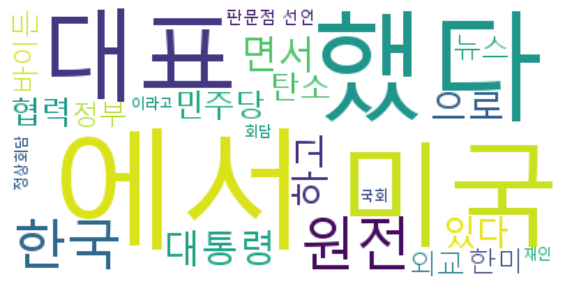


========== Trigram =============================================================
 웨스 하우스 여전 한국 표준 원전 1000 1400 건설 사용 대부분 미국 기술 들이 한국 기업 공적 으로 이전 되었음 에도 불구 하고 웨스 하우스 여전 한국 표준 원전 1000 1400 건설 사용 대부분 미국 기술 들이 한국 기업 공적 으로 이전 되었음 에도 불구 하고 웨스 하우스 라이선스 제품 으로 간주 하고 있다 면서 분야 원전 폐기 시장 에서 한미 간의 전략 협력 으로 견제 필요 있다 건의 했다 탄소 중립 달성 위해 이미 수원 에서 개발 하고 있고 중공업 미국 뉴스 케일 사가 진행 하고 있는 기술 개발 가속 있게 되었다 면서 브릿 에너지 삼아 탄소 시대 정적 전력 공급 도모 있겠다 적었다
lenMaxSent : 79
sizeVocab : 400

========== RNN =================================================================
웨스 하우스 는 한국 형 원전 이라고 불 린다 . 탄소 중립 나 신고리 원자력발전소 달성 에서 에서 에서 에서 등 에서 개발 하고 있고 두 산 중공업 과 미국 뉴스 케일 사가 진행 하고 있는 기술 개발 이 가속 화 될 수 있게 되었다 면서 을 브릿 지 에너지 로 삼아 탈 탄소 시대 의 안 정적 인 전력 공급 을 도모 할 수 있겠다 고 적었다 . 판문점 선언 의 한국 쿼드 참여 요청 이 바탕 무단 무단 전 재배 포 금지 금지 재배 포 금지 재배 포 금지 흔들리는 세대 승기 승기 승기 승기 장 회담 우회 쓰지 승기 승기 비즈 우회 우회
lenMaxSent : 80
sizeVocab : 400

========== RNN + Reset =========================================================
웨스 하우스 는 한국 형 표준 원전 1000 과 1400 을 둘러싸고 의 대부분 의 미국 의

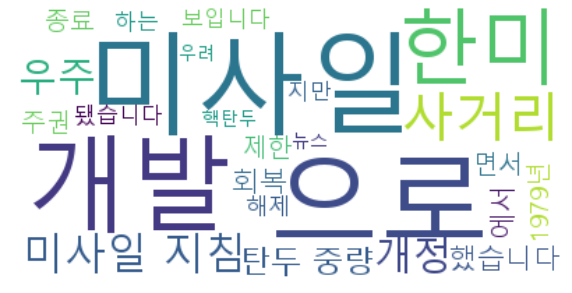


========== Trigram =============================================================
 미사일 지침 으로 사거리 180 제한 한미 미사일 지침 종료 한미 동맹 신뢰 회복 상징 하는 의미 으로 보입니다 탄두 중량 그대로 였고 2017년 개정 에서 사거리 300 늘어났 지만 탄두 중량 한반도 안보 역량 추기 충분 이상 지침 종료 한미 동맹 신뢰 회복 상징 하는 의미 으로 보입니다 개정 에서 사거리 300 늘어났 지만 탄두 중량 500 으로 제한 했습니다 로켓 개발 초석 앵커 한미 정상 미사일 지침 으로 사거리 180 제한 한미 미사일 양해 각서 시작 었습니 미사일 개발 물론 군사위성 발사 우주 로켓 개발 우주 강국 으로 하는 초석 쌓게 됐습니다 미사일 주권 완전 회복 했습니다 사거리 180 제한 한미 미사일 양해 각서 시작 었습니 장거리 미사일 군사위성 우주 로켓 개발 우주 강국 으로
lenMaxSent : 66
sizeVocab : 245

========== RNN =================================================================
미사일 지침 가 주권 회복 이 아닌 경쟁 으로 비쳐 질 경우 주 변국 의 우려 를 자아 낼 수 있다는 점 에서 앞 으로 고도 의 외교 력 이 뒷받침 돼야 할 것 으로 보입니다 . 탄두 중량 . 개정 에서 . 로켓 개발 했습니다 . 미사일 개발 까지 까지 까지 차례 도 이제 이제 거리 받지 받지 받지 마음대로 을 통해 할 에어 알 도록 세밀 퀴즈 팟 갤 정세관 세밀 를 드려요 . 미사일 주권 . 사거리 180 . 장거리 미사일 지침 종료 미사일 주권 회복 장거리 미사일 주권 회복 장거리 미사일 지침 을 해 제하 면서 우리 도 이제 거리 에 구애 받지 않고 마음대로 미사일 을 개발 할 수 있게 됐습니다
lenMaxSent : 67
sizeVocab : 245

========== RNN + Reset ==============

In [ ]:
def strOut(argStr, argStrSubj):
    lenSubj = len(argStrSubj)
    print(f"\n========== {argStrSubj} ", end="")
    print("="*(80-12-lenSubj))
    print(argStr)
    
    
numNews = 3
numWordCloud = 25
numWord = 100
numEpochs=100
lstPosStop=[]
lstPosStopWC = ["VX", "VC", "MD", "MA", "IC", "JK", "JX", "JC", "E", "X", "S", "U"]

def summary():
    naverNewsUrl = "https://news.naver.com"
    lstSumNews = []
    strTmp = ""
    
    lstTextNews = getLstTextNews(naverNewsUrl, numNews)
    for aNews in lstTextNews:
        
        strOut(aNews, "Original Sentence")
        
        makeWordCloud(aNews, numWordCloud, lstPosStopWC)
        
        # Trigram을 이용하여 50단어로 요약(제거 품사는 없음)
        strTmp = genSentByNGram(aNews, numWord, lstPosStop)
        strOut(strTmp, "Trigram")
        
        # genSentByRnn(argStr, argLstPosStop, argType="Norm", argReset=False, argNumWord=100, argEpochs=100):
        strTmp = genSentByRnn(aNews, lstPosStop, argType="Norm",   argReset=False, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN")

        strTmp = genSentByRnn(aNews, lstPosStop, argType="Ending", argReset=True,  argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + Reset")

        strTmp = genSentByRnn(aNews, lstPosStop, argType="Ending", argReset=True,  argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + Reset + Ending")

        
        # genSentByRnnWithPos(argStr, argLstPosStop, argReset=True, argEnhanceSeed=True, argNumWord=100, argEpochs=100):
        strTmp = genSentByRnnWithPos(aNews, lstPosStop, argReset=False, argEnhanceSeed=False, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + POS")

        strTmp = genSentByRnnWithPos(aNews, lstPosStop, argReset=False, argEnhanceSeed=True, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + POS + EnhanceSeed")
        
        strTmp = genSentByRnnWithPos(aNews, lstPosStop, argReset=True,  argEnhanceSeed=True, argNumWord=numWord, argEpochs=numEpochs)
        strOut(strTmp, "RNN + POS + EnhanceSeed + Reset")

summary()

## 향후
- 형태소 분석기 교체
    - 사용자 사전 사용 가능한...
- Seed 선택 방법
- 문장 단위로 재생성
- 문장 생성시 품사 고려
- 